In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

ডেটা লোড করা

In [6]:
df = pd.read_csv('C:\\Users\\USER-11\\Downloads\\titanic.csv')

প্রথম ৫টি সারি দেখা

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
ডেটার সংক্ষিপ্ত বিবরণ দেখা

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


চেক করা কোন কলামে কতগুলো ডেটা নেই

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age কলামের খালি ঘরগুলো গড় (mean) দিয়ে পূরণ করা

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

Sex কলামকে নাম্বার করা (male=0, female=1) কারণ মেশিন শব্দ বোঝে না

In [11]:
df['Sex'] = df['Sex'].map({'male': 0,'female' : 1})

একটি বার-চার্ট তৈরি করা

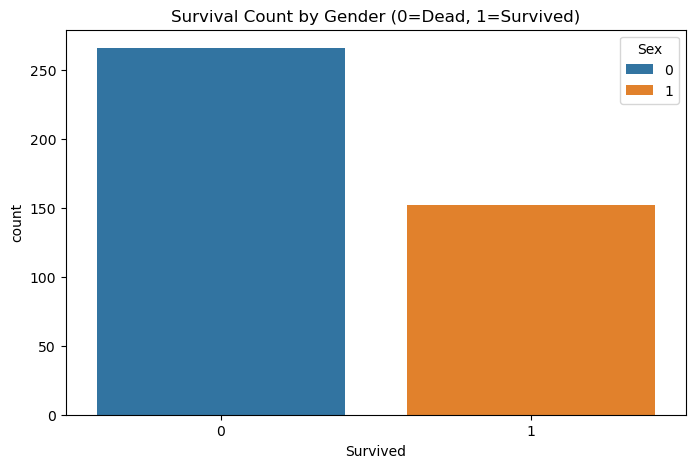

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender (0=Dead, 1=Survived)')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn .compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn .preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn .metrics import r2_score

targer column

In [14]:
x = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [15]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [16]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [17]:
numerical_transformer = Pipeline(steps=[
                               ('imputer',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())
])

In [18]:
categorical_transformer = Pipeline(steps=[
                                  ('imputer',SimpleImputer(strategy='most_frequent')),
                                  ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer(transformers=[
                                 ('num',numerical_transformer,numerical_cols),
                                 ('cat',categorical_transformer,categorical_cols)
])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn .ensemble import RandomForestClassifier

In [22]:
model = Pipeline(steps=[
                      ('pre',preprocessor),('reg',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [23]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Sex', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'Embarked'])])),
                ('reg', RandomForestClassifier(random_state=42))])

In [25]:
prediction = model.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction)*100:.4f}')

Accuracy:100.0000


My accuracy is 100%

In conclusion, the Random Forest classifier model, combined with an automated preprocessing pipeline, successfully predicts titanic survived with 100% accuracy. This demonstrates the effectiveness of ensemble learning and proper feature engineering in handling real-world datasets."